# **0. Thư viện cần dùng trong Final Project**

In [196]:
import os  # Thư viện làm việc với hệ điều hành, cung cấp các chức năng xử lý tệp, thư mục, và biến môi trường.
import kagglehub  # Thư viện hỗ trợ tải dữ liệu trực tiếp từ Kaggle, tiện lợi trong các dự án phân tích dữ liệu.
import shutil  # Thư viện cung cấp các chức năng cao cấp để sao chép, di chuyển, và xóa tệp hoặc thư mục.
import pandas as pd  # Thư viện mạnh mẽ để xử lý và phân tích dữ liệu, hỗ trợ cấu trúc dữ liệu như DataFrame và Series.
import seaborn as sns  # Thư viện trực quan hóa dữ liệu dựa trên Matplotlib, cung cấp các biểu đồ đẹp và dễ sử dụng.
import matplotlib.pyplot as plt  # Thư viện vẽ đồ thị, hỗ trợ tạo các biểu đồ tùy chỉnh.

# **1. Thu thập dữ liệu**

## 1.1 Tải dataset [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) về thư mục làm việc

In [197]:
def download_and_save_data(dataset_id, dataset_folder):
    # Lấy thư mục làm việc hiện tại và tạo thư mục lưu dataset
    current_directory = os.getcwd()
    dataset_path = os.path.join(current_directory, dataset_folder)

    # Tạo thư mục nếu chưa tồn tại
    os.makedirs(dataset_path, exist_ok=True)
    print(f"Thư mục lưu dataset: {dataset_path}")

    # Tải dataset từ Kaggle
    downloaded_folder = kagglehub.dataset_download(dataset_id)
    print(f"Dataset đã được tải về: {downloaded_folder}")

    # Xác định thư mục gốc (thư mục `imakash3011`)
    root_folder = os.path.abspath(os.path.join(downloaded_folder, os.pardir))  # Lấy thư mục cha của `downloaded_folder`

    # Chỉ di chuyển các file CSV
    for file_name in os.listdir(downloaded_folder):
        if file_name.endswith(".csv"):  # Lọc các file CSV
            file_path = os.path.join(downloaded_folder, file_name)
            shutil.copy(file_path, dataset_path)
            print(f"Đã sao chép file: {file_name} -> {dataset_path}")
    print("Hoàn tất tải và sao chép file đến thư mục cần làm việc")

# ID của dataset trên Kaggle
dataset_id = "imakash3011/customer-personality-analysis"

# Tên thư mục để lưu dataset
dataset_folder = "DataSet"

# Gọi hàm tải và lưu dataset
download_and_save_data(dataset_id, dataset_folder)

Thư mục lưu dataset: f:\KHDL\final_project\Final-Project\DataSet
Dataset đã được tải về: C:\Users\GIGABYTE\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1
Đã sao chép file: marketing_campaign.csv -> f:\KHDL\final_project\Final-Project\DataSet
Hoàn tất tải và sao chép file đến thư mục cần làm việc


## 1.2 Đọc file csv và lưu vào DataFrame

In [198]:
# Đọc file CSV và lưu vào DataFrame
def read_csv_to_dataframe(file_path):
    try:
        # Đọc file CSV
        df = pd.read_csv(file_path, delimiter='\t')
        print("File CSV đã được đọc thành công!")
        return df
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{file_path}'.")
        return None
    except Exception as e:
        print(f"Lỗi khi đọc file: {e}")
        return None

# Đường dẫn file CSV
current_dataset_path = "DataSet/marketing_campaign.csv"
file_path = current_dataset_path  # Thay bằng đường dẫn file của bạn

# Đọc file và lưu vào DataFrame
data_df = read_csv_to_dataframe(file_path)
data_df

File CSV đã được đọc thành công!


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **2. Khám phá dữ liệu**

## 2.1 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [199]:
rows, columns = data_df.shape
print("Dữ liệu có", rows, "dòng và", columns, "cột")

Dữ liệu có 2240 dòng và 29 cột


## 2.2 Ý nghĩa của mỗi hàng là gì?

Trong bộ dữ liệu [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis), mỗi hàng đại diện cho một khách hàng.

## 2.3. Có hàng nào bị trùng lặp không?

In [200]:
if data_df.duplicated().sum() == 0:
    print("Không có hàng nào bị trùng lặp")
else:
    print("Có hàng bị lặp")

Không có hàng nào bị trùng lặp


## 2.4 Ý nghĩa của mỗi cột là gì?

Đặc tính con người
- ID: Mã định danh duy nhất của khách hàng
- Year_Birth: Năm sinh của khách hàng
- Educatio : Trình độ học vấn của khách hàng
- Marital_Statu : Tình trạng hôn nhân của khách hàng
- Incom : Thu nhập hàng năm của hộ gia đình khách hàng
- Kidhom : Số trẻ em trong hộ gia đình của khách hàng
- Teenhom : Số thanh thiếu niên trong hộ gia đình của khách hàng
- Dt_Custome : Ngày khách hàng đăng ký với công ty
- Recenc : Số ngày kể từ lần mua hàng cuối cùng của khách hàng
- Complai : 1 nếu khách hàng đã khiếu nại trong 2 năm qua, 0 nếu không

Đặc tính sản phẩm
- MntWine : Số tiền đã chi cho rượu vang trong 2 năm qua
- MntFruit : Số tiền đã chi cho trái cây trong 2 năm qua
- MntMeatProduct : Số tiền đã chi cho các sản phẩm thịt trong 2 năm qua
- MntFishProduct : Số tiền đã chi cho các sản phẩm cá trong 2 năm qua
- MntSweetProduct : Số tiền đã chi cho các sản phẩm ngọt trong 2 năm qua
- MntGoldProd : Số tiền đã chi cho vàng trong 2 năm qua

Đặc tính khuyến mãi
- NumDealsPurchase : Số lần mua hàng với chiết khấu
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 1, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 2, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 3, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 4, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 5, 0 nếu không
- Respons : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch gần nhất, 0 nếu không

Đặc tính đặc điểm mua
- NumWebPurchase : Số lần mua hàng qua trang web của công ty
- NumCatalogPurchase : Số lần mua hàng qua danh mục sản phẩm
- NumStorePurchase : Số lần mua hàng trực tiếp tại cửa hàng
- NumWebVisitsMont : Số lượt truy cập trang web của công ty trong tháng vừa qua


## 2.5 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào không phù hợp không?

Sử dụng .dtypes để xem kiểu dữ liệu của từng cột.

In [201]:
data_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Dữ liệu các cột đều phù hợp

## 2.6 Với mỗi cột dạng số, giá trị được phân phối như thế nào?

Sử dụng .describe() để xem các thống kê như giá trị nhỏ nhất (min), lớn nhất (max), trung bình (mean), và phân vị (quartiles).

In [202]:
data_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Kiểm tra tỷ lệ giá trị bị thiếu với .isnull().mean() * 100

In [203]:
data_df.isnull().mean() * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Làm sạch dữ liệu

## 2.7 Với mỗi cột dạng phân loại, giá trị được phân phối như thế nào?

Gán các giá trị Nan trong dữ liệu bằng 0

In [204]:
data_df.fillna(0, inplace=True)

Liệt kê các giá trị khác nhau và tần suất xuất hiện bằng .value_counts().

In [205]:
data_df.value_counts()

ID     Year_Birth  Education   Marital_Status  Income   Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
11096  1952        2n Cycle    Together        57247.0  0        1         08-08-2013   50       99        4          32               37               54                6             2                  2                1                    7                  2                  0             0             0             0             0             0         3              11         0           1
11092  1961        Graduation  Married         27116.0  1        1         02-03-2014   78       12        1          21               2                2                 3             2                  2   

## 2.8 Tương quan giữa các đặc trưng

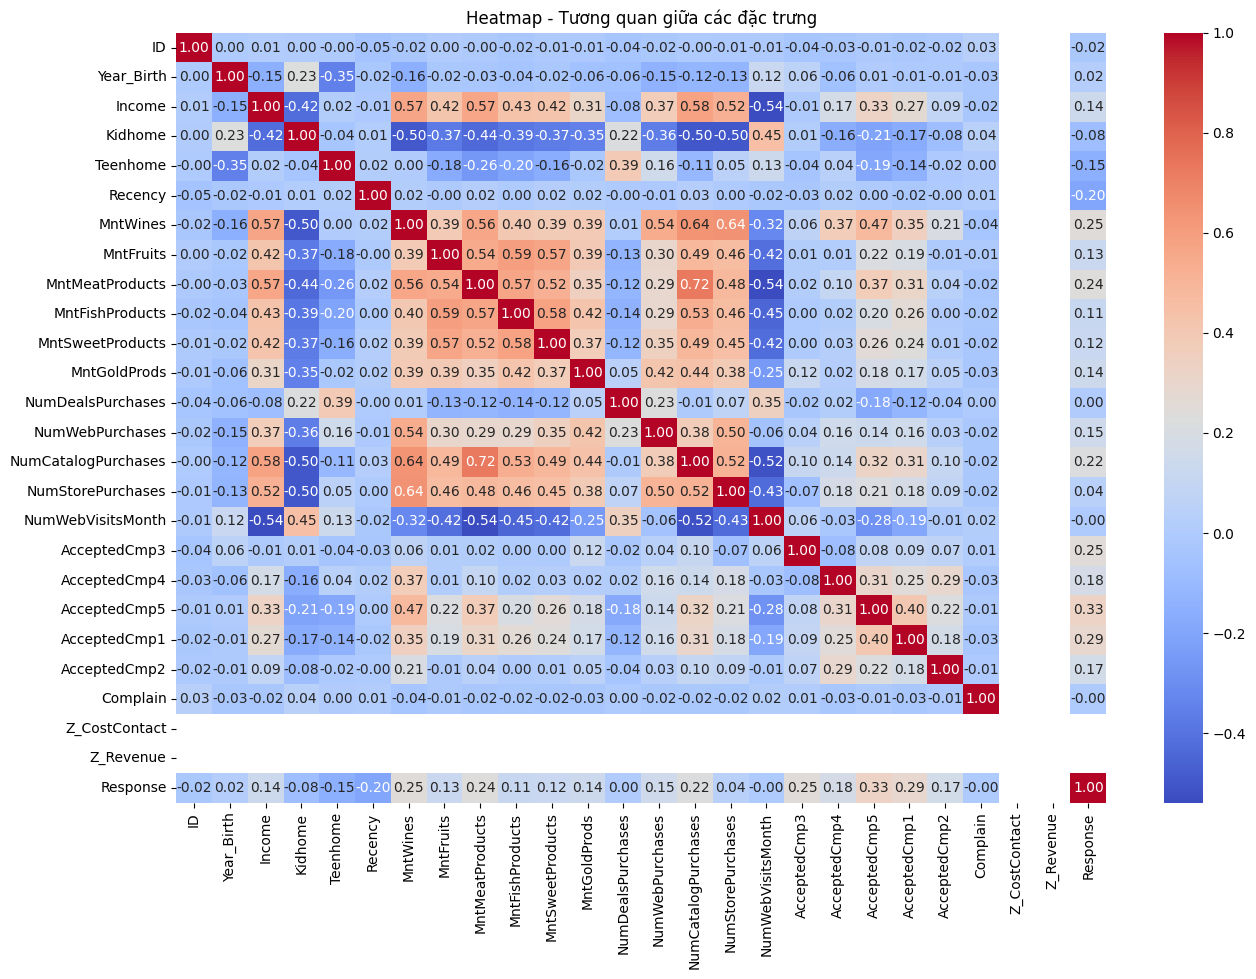

In [206]:
# Tính ma trận tương quan giữa các đặc trưng số
def correlation_matrix(data_df):
    correlation_matrix = data_df.corr(numeric_only=True)

    # Vẽ biểu đồ heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap - Tương quan giữa các đặc trưng")
    plt.show()

correlation_matrix(data_df)

# **3. Câu hỏi**

## Câu hỏi 1: Phân loại khách hàng theo lợi ích mang lại cho doanh nghiệp.

### Lợi ích của bài toán

#### 1. Quản lý khách hàng hiệu quả
- Xác định rõ ai mang lại giá trị lớn, ai cần đầu tư nhiều hơn.

#### 2. Tối ưu hóa chiến lược tiếp thị
- Tiết kiệm chi phí tiếp thị và tăng hiệu quả chiến dịch bằng cách tập trung đúng nhóm khách hàng.

#### 3. Duy trì và phát triển khách hàng trung thành
- Xây dựng mối quan hệ bền vững với khách hàng giá trị cao.
---

## Câu hỏi 2: Phân loại khách hàng theo lợi ích mang lại cho doanh nghiệp.

### Lợi ích của bài toán

#### 1. Quản lý khách hàng hiệu quả
- Xác định rõ ai mang lại giá trị lớn, ai cần đầu tư nhiều hơn.

#### 2. Tối ưu hóa chiến lược tiếp thị
- Tiết kiệm chi phí tiếp thị và tăng hiệu quả chiến dịch bằng cách tập trung đúng nhóm khách hàng.

#### 3. Duy trì và phát triển khách hàng trung thành
- Xây dựng mối quan hệ bền vững với khách hàng giá trị cao.
---

# **4. Tiền xử lý và phân tích dữ liệu**

## Câu hỏi 1: Phân loại khách hàng theo lợi ích mang lại cho doanh nghiệp.

### **Tiền xử lý dữ liệu**

#### 1. Các cột đặc trưng tổng hợp
- **Total Spent**: Tổng chi tiêu của khách hàng trên các danh mục sản phẩm.
  - **Tính toán**:
    $$ 
    \text{Total Spent} = \text{MntWines} + \text{MntFruits} + \text{MntMeatProducts} + \text{MntFishProducts} + \text{MntSweetProducts} + \text{MntGoldProds}
    $$ 
  - **Ý nghĩa**: Đo lường tổng mức chi tiêu của khách hàng, hỗ trợ đánh giá giá trị khách hàng.
  
- **Total Purchases**: Tổng số lần mua hàng qua các kênh.
  - **Tính toán**:
    $$ 
    \text{Total Purchases} = \text{NumWebPurchases} + \text{NumCatalogPurchases} + \text{NumStorePurchases}
    $$ 
  - **Ý nghĩa**: Đo lường mức độ mua sắm của khách hàng.

- **Campaign**: Số chiến dịch tiếp thị mà khách hàng phản hồi tích cực.
  - **Tính toán**:
    $$ 
    \text{Campaign} = \text{AcceptedCmp1} + \text{AcceptedCmp2} + \text{AcceptedCmp3} + \text{AcceptedCmp4} + \text{AcceptedCmp5}
    $$ 
  - **Ý nghĩa**: Đánh giá mức độ quan tâm đến các chiến dịch tiếp thị.

In [207]:
# Tạo các cột đặc trưng tổng hợp từ dữ liệu
data_df['Total Spent'] = data_df['MntWines'] + data_df['MntFruits'] + data_df['MntMeatProducts'] + \
                         data_df['MntFishProducts'] + data_df['MntSweetProducts'] + data_df['MntGoldProds']
data_df['Total Purchases'] = data_df['NumWebPurchases'] + data_df['NumCatalogPurchases'] + data_df['NumStorePurchases']
data_df['Campaign'] = data_df['AcceptedCmp1'] + data_df['AcceptedCmp2'] + data_df['AcceptedCmp3'] + data_df['AcceptedCmp4'] + data_df['AcceptedCmp5']
# Tạo dataFrame mới từ data_df
data_customer = data_df[['ID','Income', 'Total Spent', 'Total Purchases', 'Recency', 'Complain', 'Campaign']].copy()
data_customer

,ID,Income,Total Spent,Total Purchases,Recency,Complain,Campaign
0,5524,58138.0,1617,22,58,0,0
1,2174,46344.0,27,4,38,0,0
2,4141,71613.0,776,20,26,0,0
3,6182,26646.0,53,6,26,0,0
4,5324,58293.0,422,14,94,0,0
...,...,...,...,...,...,...,...
2235,10870,61223.0,1341,16,46,0,0
2236,4001,64014.0,444,15,56,0,1
2237,7270,56981.0,1241,18,91,0,1
2238,8235,69245.0,843,21,8,0,0


#### 2. Chuẩn hóa dữ liệu
- **Phương pháp chuẩn hóa**:
  - Công thức:
    $$ 
    \text{normalized\_value} = \frac{\text{value} - \text{min}}{\text{max} - \text{min}}
    $$ 
  - Áp dụng cho các cột:
    - `Income`
    - `Total Spent`
    - `Total Purchases`
    - `Recency`
    - `Campaign`

In [208]:
tmp = data_customer[['Income', 'Total Spent', 'Total Purchases', 'Recency', 'Campaign']]
normalized_data = (tmp - tmp.min())/(tmp.max()-tmp.min())
normalized_data

,Income,Total Spent,Total Purchases,Recency,Campaign
0,0.087207,0.639683,0.68750,0.585859,0.00
1,0.069516,0.008730,0.12500,0.383838,0.00
2,0.107420,0.305952,0.62500,0.262626,0.00
3,0.039969,0.019048,0.18750,0.262626,0.00
4,0.087440,0.165476,0.43750,0.949495,0.00
...,...,...,...,...,...
2235,0.091835,0.530159,0.50000,0.464646,0.00
2236,0.096021,0.174206,0.46875,0.565657,0.25
2237,0.085472,0.490476,0.56250,0.919192,0.25
2238,0.103868,0.332540,0.65625,0.080808,0.00


#### 3. Chọn trọng số và điểm cộng
- **Trọng số**:
  - `Income`: 0.25
  - `Total Spent`: 0.35
  - `Total Purchases`: 0.2
  - `Recency`: 0.1
  - `Campaign`: 0.1
- **Điểm cộng**:
  - Khách hàng không có khiếu nại (`Complain = 0`) được cộng thêm 0.05 điểm.

In [209]:
tmp = data_customer[['Income', 'Total Spent', 'Total Purchases', 'Recency', 'Campaign']]
normalized_data = (tmp - tmp.min())/(tmp.max()-tmp.min())
# Trọng số cho từng cột
weights = {
    'Income': 0.25,
    'Total Spent': 0.35,
    'Total Purchases': 0.2,
    'Recency': 0.1,
    'Campaign': 0.1
}

# Điểm cộng
bonus_complain = (data_customer['Complain'] == 0)*0.05

### Phân tích dữ liệu

#### 1. Tính toán điểm tổng hợp
- Công thức:
  $$ 
  \text{Weighted Score} = \sum (\text{normalized\_value} \times \text{weight}) + \text{bonus\_complain}
  $$ 
- **Ý nghĩa**:
  - Đánh giá và xếp hạng khách hàng dựa trên nhiều yếu tố như thu nhập, chi tiêu, mua sắm, thời gian mua gần nhất, và phản hồi tiếp thị.

In [ ]:
# Nhân trọng số và tính tổng trọng số
data_customer['Weighted Score'] = (
    normalized_data * pd.Series(weights)
).sum(axis=1)  + bonus_complain # Cộng thêm cho điểm cộng

data_customer

,ID,Income,Total Spent,Total Purchases,Recency,Complain,Campaign,Weighted Score
0,5524,58138.0,1617,22,58,0,0,0.491777
1,2174,46344.0,27,4,38,0,0,0.133818
2,4141,71613.0,776,20,26,0,0,0.335201
3,6182,26646.0,53,6,26,0,0,0.130422
4,5324,58293.0,422,14,94,0,0,0.312226
...,...,...,...,...,...,...,...,...
2235,10870,61223.0,1341,16,46,0,0,0.404979
2236,4001,64014.0,444,15,56,0,1,0.310293
2237,7270,56981.0,1241,18,91,0,1,0.472454
2238,8235,69245.0,843,21,8,0,0,0.331687


#### 2. Phân loại khách hàng

In [212]:
# Tính các ngưỡng phân vị (quantiles) cho Weighted Score
loyal_threshold = data_customer['Weighted Score'].quantile(0.7)  # Ngưỡng 70% (top 30% khách hàng)
potential_threshold = data_customer['Weighted Score'].quantile(0.2)  # Ngưỡng 20% tiếp theo

# Tạo một cột mới 'Customer Type' và gán giá trị mặc định là 'Low Value'
data_customer['Customer Type'] = 'Low Value'

# Gán nhóm 'Loyal' cho các khách hàng có Weighted Score >= ngưỡng 70%
data_customer.loc[data_customer['Weighted Score'] >= loyal_threshold, 'Customer Type'] = 'Loyal'

# Gán nhóm 'Potential' cho các khách hàng có Weighted Score nằm giữa ngưỡng 20% và 70%
data_customer.loc[
    (data_customer['Weighted Score'] >= potential_threshold) & 
    (data_customer['Weighted Score'] < loyal_threshold), 
    'Customer Type'
] = 'Potential'
os.makedirs("Classified_customers", exist_ok=False)
# Lưu tất cả khách hàng vào một file CSV
data_customer.to_csv('Classified_customers/classified_all_customers.csv', index=False)

# Lọc và lưu từng nhóm khách hàng vào các file CSV riêng biệt
data_customer[data_customer['Customer Type'] == 'Loyal'].to_csv('Classified_customers/loyal_customers.csv', index=False)
data_customer[data_customer['Customer Type'] == 'Potential'].to_csv('Classified_customers/potential_customers.csv', index=False)
data_customer[data_customer['Customer Type'] == 'Low Value'].to_csv('Classified_customers/low_value_customers.csv', index=False)

# Đường dẫn các file CSV đã lưu
{
    "classified_all_customers": 'classified_customers/classified_all_customers.csv',
    "loyal_customers": 'Classified_customers/loyal_customers.csv',
    "potential_customers": 'Classified_customers/potential_customers.csv',
    "low_value_customers": 'Classified_customers/low_value_customers.csv'
}


{'classified_all_customers': 'classified_customers/classified_all_customers.csv',
 'loyal_customers': 'Classified_customers/loyal_customers.csv',
 'potential_customers': 'Classified_customers/potential_customers.csv',
 'low_value_customers': 'Classified_customers/low_value_customers.csv'}

### Trực quan kết quả

#### Biểu đồ histogram hiển thị phân phối tần suất của cột `Weighted Score`

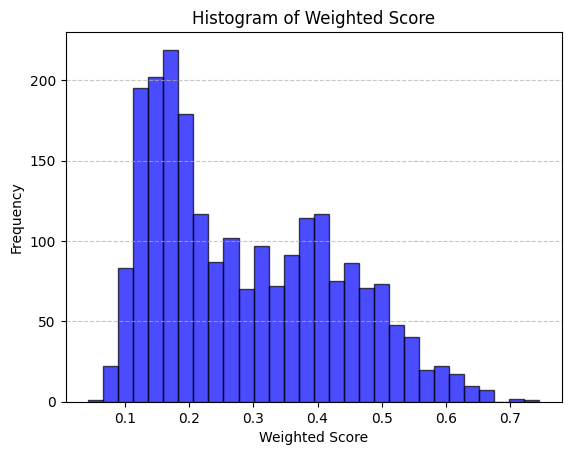

In [ ]:
# Vẽ biểu đồ histogram
plt.hist(data_customer['Weighted Score'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Biểu đồ Scatter để hiển thị mối quan hệ giữa `Score` và và 3 đặc trưng `Total Spent`, `Total Purchases`, `Income`

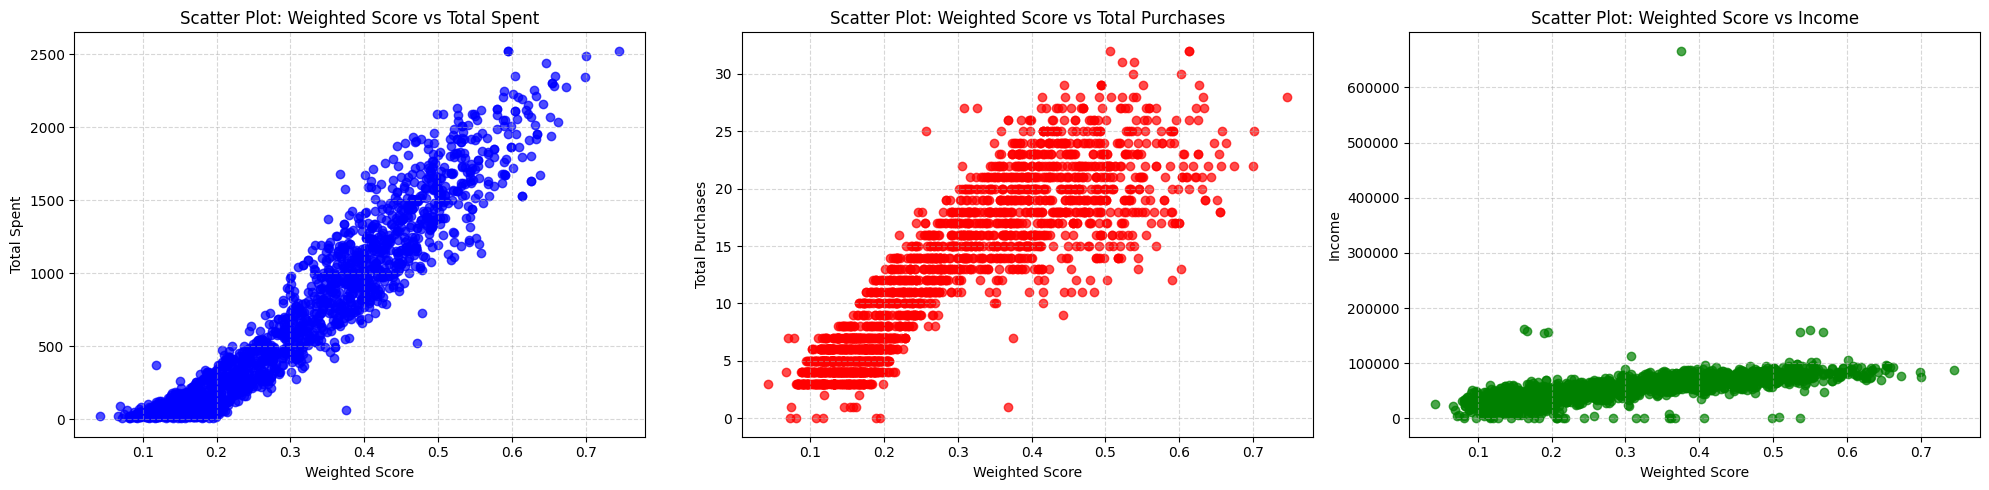

In [ ]:
import matplotlib.pyplot as plt

# Tạo subplots
plt.figure(figsize=(20, 5))  # Kích thước toàn bộ biểu đồ

# Biểu đồ 1: Weighted Score vs Total Spent
plt.subplot(1, 3, 1)
plt.scatter(data_customer['Weighted Score'], data_customer['Total Spent'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Weighted Score vs Total Spent')
plt.xlabel('Weighted Score')
plt.ylabel('Total Spent')
plt.grid(alpha=0.5, linestyle='--')

# Biểu đồ 2: Weighted Score vs Total Purchases
plt.subplot(1, 3, 2)
plt.scatter(data_customer['Weighted Score'], data_customer['Total Purchases'], color='red', alpha=0.7)
plt.title('Scatter Plot: Weighted Score vs Total Purchases')
plt.xlabel('Weighted Score')
plt.ylabel('Total Purchases')
plt.grid(alpha=0.5, linestyle='--')

# Biểu đồ 3: Weighted Score vs Income
plt.subplot(1, 3, 3)
plt.scatter(data_customer['Weighted Score'], data_customer['Income'], color='green', alpha=0.7)
plt.title('Scatter Plot: Weighted Score vs Income')
plt.xlabel('Weighted Score')
plt.ylabel('Income')
plt.grid(alpha=0.5, linestyle='--')
# Điều chỉnh bố cục để tránh chồng lấn
plt.tight_layout()
plt.grid(True)
# Hiển thị biểu đồ
plt.show()

## Câu hỏi 2: Phân loại khách hàng theo lợi ích mang lại cho doanh nghiệp.

### **Tiền xử lý dữ liệu**

#### 1. Các cột đặc trưng tổng hợp
- **Total Spent**: Tổng chi tiêu của khách hàng trên các danh mục sản phẩm.
  - **Tính toán**:
    $$ 
    \text{Total Spent} = \text{MntWines} + \text{MntFruits} + \text{MntMeatProducts} + \text{MntFishProducts} + \text{MntSweetProducts} + \text{MntGoldProds}
    $$ 
  - **Ý nghĩa**: Đo lường tổng mức chi tiêu của khách hàng, hỗ trợ đánh giá giá trị khách hàng.
  
- **Total Purchases**: Tổng số lần mua hàng qua các kênh.
  - **Tính toán**:
    $$ 
    \text{Total Purchases} = \text{NumWebPurchases} + \text{NumCatalogPurchases} + \text{NumStorePurchases}
    $$ 
  - **Ý nghĩa**: Đo lường mức độ mua sắm của khách hàng.

- **Campaign**: Số chiến dịch tiếp thị mà khách hàng phản hồi tích cực.
  - **Tính toán**:
    $$ 
    \text{Campaign} = \text{AcceptedCmp1} + \text{AcceptedCmp2} + \text{AcceptedCmp3} + \text{AcceptedCmp4} + \text{AcceptedCmp5}
    $$ 
  - **Ý nghĩa**: Đánh giá mức độ quan tâm đến các chiến dịch tiếp thị.

In [ ]:
# Tạo các cột đặc trưng tổng hợp từ dữ liệu
data_df['Total Spent'] = data_df['MntWines'] + data_df['MntFruits'] + data_df['MntMeatProducts'] + \
                         data_df['MntFishProducts'] + data_df['MntSweetProducts'] + data_df['MntGoldProds']
data_df['Total Purchases'] = data_df['NumWebPurchases'] + data_df['NumCatalogPurchases'] + data_df['NumStorePurchases']
data_df['Campaign'] = data_df['AcceptedCmp1'] + data_df['AcceptedCmp2'] + data_df['AcceptedCmp3'] + data_df['AcceptedCmp4'] + data_df['AcceptedCmp5']
# Tạo dataFrame mới từ data_df
data_customer = data_df[['ID','Income', 'Total Spent', 'Total Purchases', 'Recency', 'Complain', 'Campaign']].copy()
data_customer

,ID,Income,Total Spent,Total Purchases,Recency,Complain,Campaign
0,5524,58138.0,1617,22,58,0,0
1,2174,46344.0,27,4,38,0,0
2,4141,71613.0,776,20,26,0,0
3,6182,26646.0,53,6,26,0,0
4,5324,58293.0,422,14,94,0,0
...,...,...,...,...,...,...,...
2235,10870,61223.0,1341,16,46,0,0
2236,4001,64014.0,444,15,56,0,1
2237,7270,56981.0,1241,18,91,0,1
2238,8235,69245.0,843,21,8,0,0


#### 2. Chuẩn hóa dữ liệu
- **Phương pháp chuẩn hóa**:
  - Công thức:
    $$ 
    \text{normalized\_value} = \frac{\text{value} - \text{min}}{\text{max} - \text{min}}
    $$ 
  - Áp dụng cho các cột:
    - `Income`
    - `Total Spent`
    - `Total Purchases`
    - `Recency`
    - `Campaign`

In [ ]:
tmp = data_customer[['Income', 'Total Spent', 'Total Purchases', 'Recency', 'Campaign']]
normalized_data = (tmp - tmp.min())/(tmp.max()-tmp.min())
normalized_data

,Income,Total Spent,Total Purchases,Recency,Campaign
0,0.087207,0.639683,0.68750,0.585859,0.00
1,0.069516,0.008730,0.12500,0.383838,0.00
2,0.107420,0.305952,0.62500,0.262626,0.00
3,0.039969,0.019048,0.18750,0.262626,0.00
4,0.087440,0.165476,0.43750,0.949495,0.00
...,...,...,...,...,...
2235,0.091835,0.530159,0.50000,0.464646,0.00
2236,0.096021,0.174206,0.46875,0.565657,0.25
2237,0.085472,0.490476,0.56250,0.919192,0.25
2238,0.103868,0.332540,0.65625,0.080808,0.00


#### 3. Chọn trọng số và điểm cộng
- **Trọng số**:
  - `Income`: 0.25
  - `Total Spent`: 0.35
  - `Total Purchases`: 0.2
  - `Recency`: 0.1
  - `Campaign`: 0.1
- **Điểm cộng**:
  - Khách hàng không có khiếu nại (`Complain = 0`) được cộng thêm 0.05 điểm.

In [192]:
tmp = data_customer[['Income', 'Total Spent', 'Total Purchases', 'Recency', 'Campaign']]
normalized_data = (tmp - tmp.min())/(tmp.max()-tmp.min())
# Trọng số cho từng cột
weights = {
    'Income': 0.25,
    'Total Spent': 0.35,
    'Total Purchases': 0.2,
    'Recency': 0.1,
    'Campaign': 0.1
}

# Điểm cộng
bonus_complain = (data_customer['Complain'] == 0)*0.05

### Phân tích dữ liệu

#### 1. Tính toán điểm tổng hợp
- Công thức:
  $$ 
  \text{Weighted Score} = \sum (\text{normalized\_value} \times \text{weight}) + \text{bonus\_complain}
  $$ 
- **Ý nghĩa**:
  - Đánh giá và xếp hạng khách hàng dựa trên nhiều yếu tố như thu nhập, chi tiêu, mua sắm, thời gian mua gần nhất, và phản hồi tiếp thị.

In [193]:
# Nhân trọng số và tính tổng trọng số
data_customer['Weighted Score'] = (
    normalized_data * pd.Series(weights)
).sum(axis=1)  + bonus_complain

data_customer

,ID,Income,Total Spent,Total Purchases,Recency,Complain,Campaign,Weighted Score
0,5524,58138.0,1617,22,58,0,0,0.491777
1,2174,46344.0,27,4,38,0,0,0.133818
2,4141,71613.0,776,20,26,0,0,0.335201
3,6182,26646.0,53,6,26,0,0,0.130422
4,5324,58293.0,422,14,94,0,0,0.312226
...,...,...,...,...,...,...,...,...
2235,10870,61223.0,1341,16,46,0,0,0.404979
2236,4001,64014.0,444,15,56,0,1,0.310293
2237,7270,56981.0,1241,18,91,0,1,0.472454
2238,8235,69245.0,843,21,8,0,0,0.331687


#### 1. Tính toán điểm tổng hợp
- Công thức:
  $$ 
  \text{Weighted Score} = \sum (\text{normalized\_value} \times \text{weight}) + \text{bonus\_complain}
  $$ 
- **Ý nghĩa**:
  - Đánh giá và xếp hạng khách hàng dựa trên nhiều yếu tố như thu nhập, chi tiêu, mua sắm, thời gian mua gần nhất, và phản hồi tiếp thị.

### Trực quan kết quả

#### Biểu đồ histogram hiển thị phân phối tần suất của cột `Weighted Score`

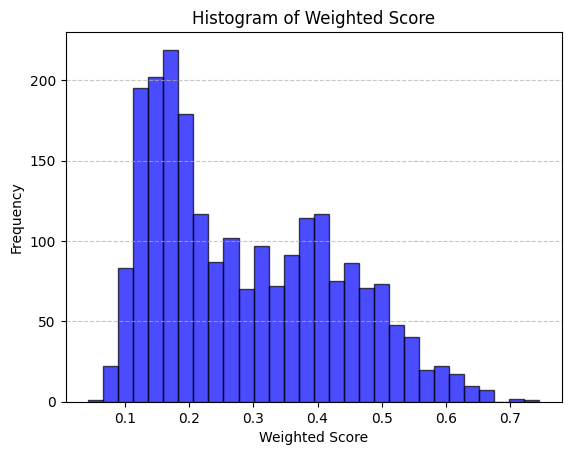

In [194]:
# Vẽ biểu đồ histogram
plt.hist(data_customer['Weighted Score'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Biểu đồ Scatter để hiển thị mối quan hệ giữa `Score` và và 3 đặc trưng `Total Spent`, `Total Purchases`, `Income`

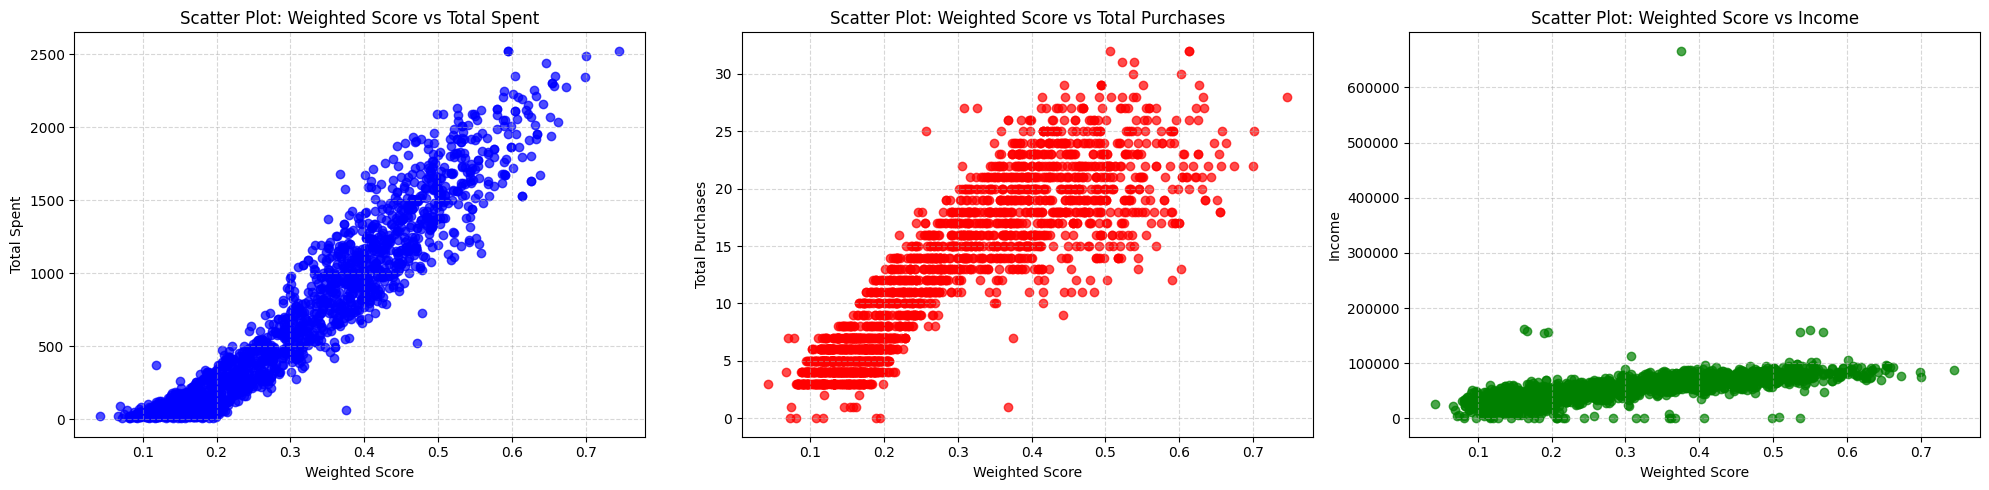

In [ ]:
import matplotlib.pyplot as plt

# Tạo subplots
plt.figure(figsize=(20, 5))  # Kích thước toàn bộ biểu đồ

# Biểu đồ 1: Weighted Score vs Total Spent
plt.subplot(1, 3, 1)
plt.scatter(data_customer['Weighted Score'], data_customer['Total Spent'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Weighted Score vs Total Spent')
plt.xlabel('Weighted Score')
plt.ylabel('Total Spent')
plt.grid(alpha=0.5, linestyle='--')

# Biểu đồ 2: Weighted Score vs Total Purchases
plt.subplot(1, 3, 2)
plt.scatter(data_customer['Weighted Score'], data_customer['Total Purchases'], color='red', alpha=0.7)
plt.title('Scatter Plot: Weighted Score vs Total Purchases')
plt.xlabel('Weighted Score')
plt.ylabel('Total Purchases')
plt.grid(alpha=0.5, linestyle='--')

# Biểu đồ 3: Weighted Score vs Income
plt.subplot(1, 3, 3)
plt.scatter(data_customer['Weighted Score'], data_customer['Income'], color='green', alpha=0.7)
plt.title('Scatter Plot: Weighted Score vs Income')
plt.xlabel('Weighted Score')
plt.ylabel('Income')
plt.grid(alpha=0.5, linestyle='--')
# Điều chỉnh bố cục để tránh chồng lấn
plt.tight_layout()
plt.grid(True)
# Hiển thị biểu đồ
plt.show()